In [1]:
import sys

sys.path.append("../src")

from solver.quantum import solver_VQAA, plot_distribution

import networkx as nx
from networkx.algorithms import approximation as approx

from pulser import Pulse, Sequence, Register
from pulser.devices import Chadoq2

# 1.  Five atoms graph

Maximum independent set of G: {1, 3, 4}


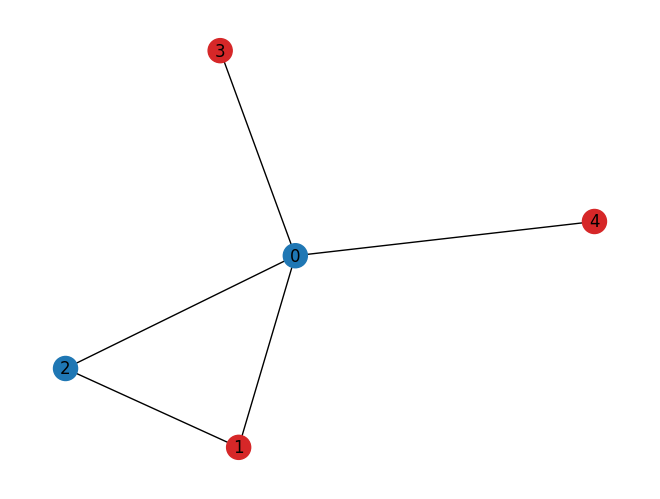

In [2]:
G = nx.Graph(
    [
        (0, 1),
        (0, 2),
        (0, 3),
        (0, 4),
        (1, 2),
    ]
) 

I = approx.maximum_independent_set(G)
print(f"Maximum independent set of G: {I}")

pos = nx.spring_layout(G) #, seed=39299899
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in G],
)

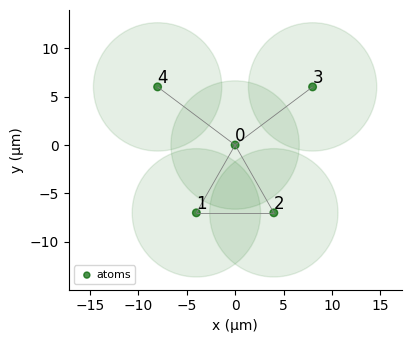

In [3]:
qubits = {'0': (0,0), '1': (-4,-7), '2': (4, -7), '3': (8,6), '4': (-8, 6)}
reg = Register(qubits)
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True
)

In [4]:
counts_solution, solution = solver_VQAA(reg, G, number_best_solutions = 3, repetitions = 1)

/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser/sequence/sequence.py:1283: UserWarning: A duration of 10333 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 10336 ns.
  self._add(pulse, channel, protocol)
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser/sequence/sequence.py:1283: UserWarning: A duration of 10555 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 10556 ns.
  self._add(pulse, channel, protocol)
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser/sequence/sequence.py:1283: UserWarning: A duration of 10833 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 10836 ns.
  self._add(pulse, channel, protocol)
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser/sequence/sequence.py:1283: UserWarning: A duration of 11111 ns is not a multiple of the channel's clock period (4 ns

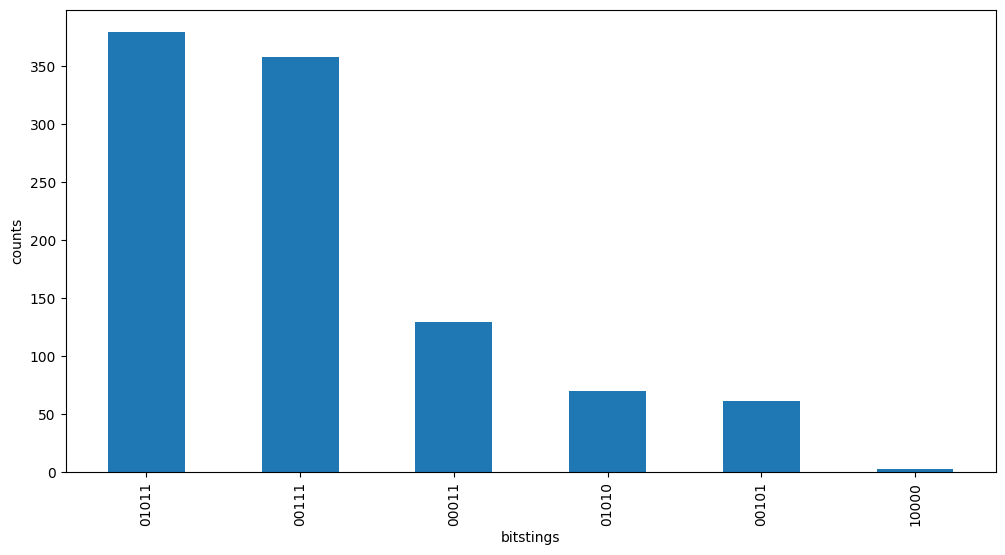

In [5]:
plot_distribution(counts_solution)

In [6]:
solution

[['1', '3', '4'], ['2', '3', '4'], ['3', '4']]

# 2. 8 atoms graph 

Maximum independent set of G: {3, 4, 5, 6}


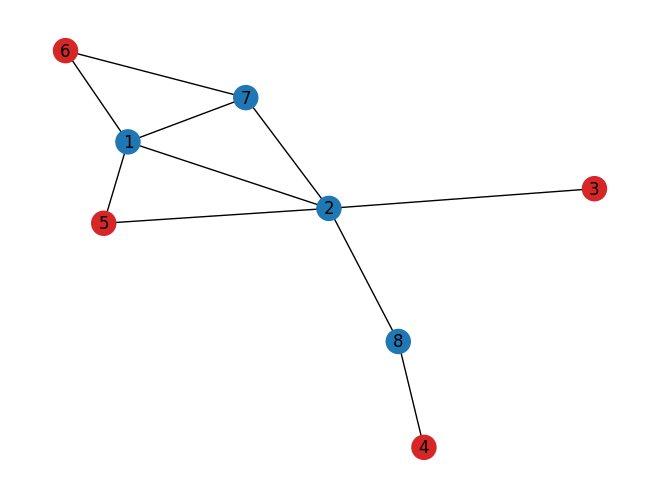

In [7]:
G_8 = nx.Graph(
    [
        (1, 2),
        (7, 2),
        (3, 2),
        (7, 6),
        (5, 2),
        (1, 5),
        (2, 8),
        (1, 7),
        (6, 1),
        (8, 4),
    ]
)

I = approx.maximum_independent_set(G_8)
print(f"Maximum independent set of G: {I}")

pos = nx.spring_layout(G_8, seed=39299899)
nx.draw(
    G_8,
    pos=pos,
    with_labels=True,
    node_color=["tab:red" if n in I else "tab:blue" for n in G_8],
)

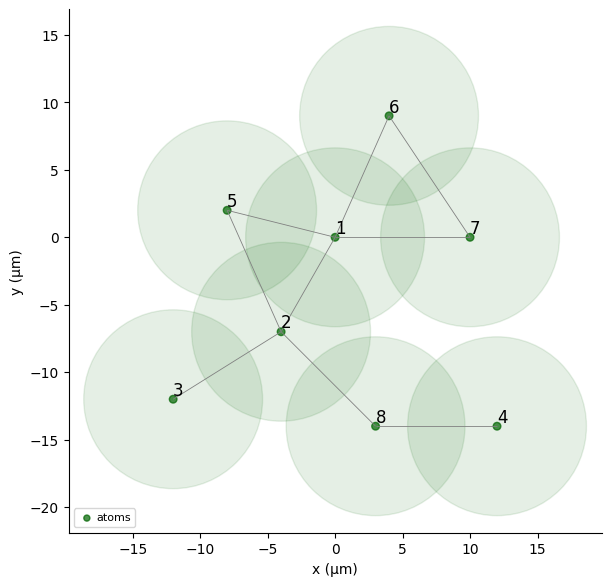

In [8]:
qubits = {'1': (0,0), '2': (-4,-7), '3': (-12, -12), '4': (12,-14), '5': (-8, 2),  '6': (4,9), '7': (10,0), '8': (3,-14)}
reg2 = Register(qubits) 
reg2.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True
)

In [16]:
counts_solution_2, solution_2 = solver_VQAA(reg2, G_8, number_best_solutions = 7, time_range= (15,30), repetitions = 16)

/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser/sequence/sequence.py:1283: UserWarning: A duration of 18450 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 18452 ns.
  self._add(pulse, channel, protocol)
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser/sequence/sequence.py:1283: UserWarning: A duration of 18225 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 18228 ns.
  self._add(pulse, channel, protocol)
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser/sequence/sequence.py:1283: UserWarning: A duration of 17950 ns is not a multiple of the channel's clock period (4 ns). It was rounded up to 17952 ns.
  self._add(pulse, channel, protocol)
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser/sequence/sequence.py:1283: UserWarning: A duration of 17987 ns is not a multiple of the channel's clock period (4 ns

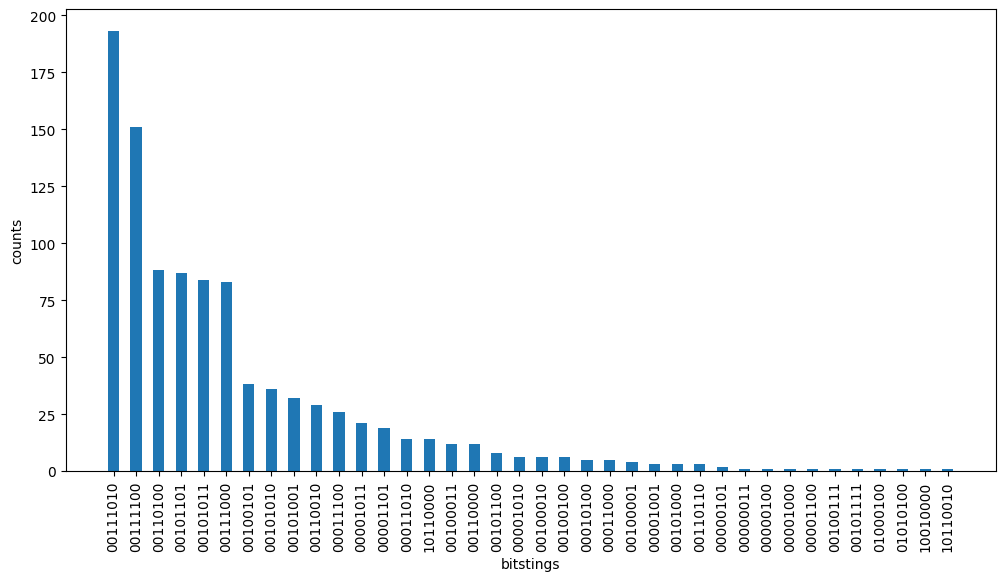

In [17]:
plot_distribution(counts_solution_2)

In [18]:
solution_2

[['3', '4', '5', '7'],
 ['3', '4', '5', '6'],
 ['3', '4', '6'],
 ['3', '5', '6', '8'],
 ['3', '5', '7', '8'],
 ['3', '4', '5'],
 ['3', '6', '8']]